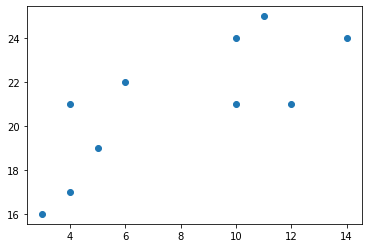

In [1]:
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

C:\Users\Mili Mondal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


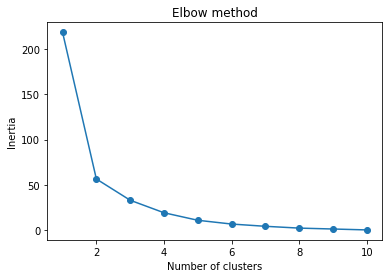

In [2]:
#Using Elbow Method
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

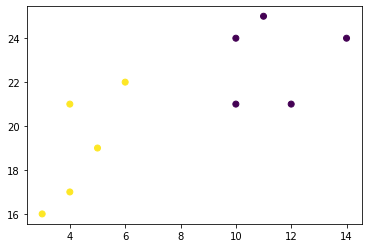

In [3]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

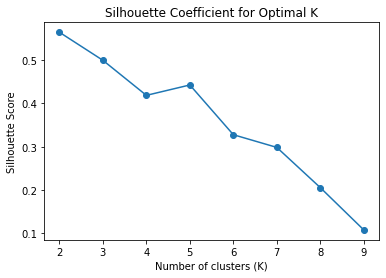

Optimal number of clusters (K): 2


In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Data
x = [4, 5, 10, 4, 3, 11, 14, 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
data = list(zip(x, y))

# Adjust the range for K
silhouette_scores = []
k_values = range(2, len(data))  # K must be at least 2 and less than the number of data points

# Compute silhouette scores for valid K values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    labels = kmeans.labels_
    score = silhouette_score(data, labels)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Coefficient for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

# Find the optimal K
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters (K): {optimal_k}")


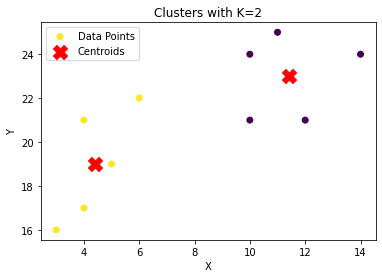

In [6]:
# Optimal K (from silhouette scores)
optimal_k = 2  # Replace with the calculated optimal_k value if available

# Fit KMeans model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data)

# Extract cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot clusters
plt.scatter(x, y, c=labels, cmap='viridis', label="Data Points")

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label="Centroids")

# Add title and labels
plt.title(f"Clusters with K={optimal_k}")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()